# Mini Project

## Dataset 3 : The Movie Database APIs
Source : https://www.themoviedb.org/

Documentation : https://developers.themoviedb.org/3/getting-started/introduction


Reference:
1. https://en.wikipedia.org/wiki/Lists_of_film_remakes - List of film remakes

In [12]:
# Libraries
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import requests # to make TMDB API calls
import locale   # to format currency as USD

sb.set()

### Fetch data from TMDB with the API Key 

Requested the API key from The Movie DB

For example: https://api.themoviedb.org/3/discover/movie?api_key=+++&sort_by=popularity.desc

The API key is not shown due security reason.

In [13]:
api_key = 'bd31d307e12fa2d62fda2130baec4357'

response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key='+api_key+'&primary_release_year=2017&sort_by=revenue.desc')

highest_revenue = response.json() # store parsed json response
highest_revenue_films = highest_revenue['results']

# define column names for our new dataframe
columns = ['film', 'revenue']

# create dataframe with film and revenue columns
df = pd.DataFrame(columns=columns)

# for each of the highest revenue films make an api call for that specific movie to return the budget and revenue
for film in highest_revenue_films:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    # print(locale.currency(film_revenue['revenue'], grouping=True ))
    df.loc[len(df)]=[film['title'],film_revenue['revenue']] # store title and revenue in our dataframe 
    
df.head()

,film,revenue
0,Star Wars: The Last Jedi,1332539889
1,Beauty and the Beast,1263521126
2,The Fate of the Furious,1238764765
3,Despicable Me 3,1031552585
4,Jumanji: Welcome to the Jungle,962102237


In [14]:
response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&sort_by=revenue.desc')
highest_revenue_ever = response.json()
highest_revenue_films_ever = highest_revenue_ever['results']

columns = ['film', 'revenue', 'budget', 'release_date']
highest_revenue_ever_df = pd.DataFrame(columns=columns)

for film in highest_revenue_films_ever:

    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()

    if film_revenue['budget'] > 281:
        # add film title, revenue, budget and release date to the dataframe
        highest_revenue_ever_df.loc[len(highest_revenue_ever_df)]=[film['title'],film_revenue['revenue'], (film_revenue['budget'] * -1), film_revenue['release_date']]

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue

Source of the data set is from https://www.kaggle.com/tmdb/tmdb-movie-metadatab

In [2]:
movies_data = pd.read_csv('tmdb-movies.csv')
movies_data.head() # by default, it returns the first five

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
print("The dimensions of the dataset")
movies_data.shape

The dimensions of the dataset


(10866, 21)

In [4]:
print("The information about the data types")
movies_data.dtypes

The information about the data types


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# this provides you with statistical information about the data
movies_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# This returns a Pandas Dataframe with the sums of logical True values (i.e. null value) for each columns 
null_count_df = movies_data.isnull().sum().reset_index()

# Define column labels for null_count
null_count_df.columns = ['column_name', 'null_count']

# Calculate the percentage of missing values
null_count_df['null_%'] = null_count_df['null_count']/len(movies_data)*100

# Display the columns in descending order of the percentage of missing values
null_count_df.sort_values('null_%', ascending=False).reset_index(drop=True)

,column_name,null_count,null_%
0,homepage,7930,72.979937
1,tagline,2824,25.989324
2,keywords,1493,13.740107
3,production_companies,1030,9.479109
4,cast,76,0.699429
5,director,44,0.404933
6,genres,23,0.211669
7,imdb_id,10,0.092030
8,overview,4,0.036812
9,budget_adj,0,0.000000


This table shows that there are quite a few of data columns that has null or missing values. The data set needs to clean up and eliminate these missing values before we start to analyze the data set. These columns will be dropped or deleted

In [8]:
# this returns the number of unique values in each column
movies_data.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

## Clean The Dataset

Columns that are not needed will be deleted

For budget_adj, revenue_adj, and runtime change zero values to NaN (Not a Number)

Duplicate rows will be droped

The release_date datatype will be changed from string to datetime

In [9]:
# list of columns that are to be deleted/dropped
col = ['id', 'imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview','genres','production_companies']

# deleting the columns
movies_data.drop(col, axis = 1, inplace = True)

#checking to see if the columns have been deleted
movies_data.head()

,popularity,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Replace Zeros with NaN and then drop rows with NaN

NaN stands for Not A Number and is one of the common ways to represent the missing value in the data. It is a special floating-point value and cannot be converted to any other type than float. NaN value is one of the major problems in Data Analysis. It is very essential to deal with NaN in order to get the desired results.

In [10]:
# replace zeros with NaN and recheck number of NaNs
movies_data = movies_data.replace(0, np.nan)

x =  movies_data.isnull().sum().sum()

# We print x
print('Number of NaN values in our DataFrame:', x)

Number of NaN values in our DataFrame: 11743


In [11]:
# check number of rows
movies_data.shape

(10866, 8)

In [12]:
# Removing the rows with NaN values since they will not help our analysis
movies_data.dropna(axis = 0, inplace = True)

# recheck number of rows after removing
movies_data.shape

(3855, 8)

### Drop duplicate row

In [13]:
# drop duplicates
movies_data.drop_duplicates(inplace=True)

# confirm correction by rechecking for duplicates in the data (output should be 0)
sum(movies_data.duplicated())

0

### Change release_date to datetype

In [14]:
# change and check to confirm change occurred
movies_data['release_date'] = pd.to_datetime(movies_data['release_date'])
movies_data.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    3854 non-null   float64       
 1   runtime       3854 non-null   float64       
 2   release_date  3854 non-null   datetime64[ns]
 3   vote_count    3854 non-null   int64         
 4   vote_average  3854 non-null   float64       
 5   release_year  3854 non-null   int64         
 6   budget_adj    3854 non-null   float64       
 7   revenue_adj   3854 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 271.0 KB


In [15]:
# save clean df to file as backup
movies_data.to_csv('tmdb-movies-clean.csv', index=False)

# quick look at updated stats for clean dataset
movies_data.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


The data set has been trimmed and clean. We are ready to move on for exploratory data analysis/visualization to gather relevant insights

### Exploratory Data Analysis

In [467]:
movies_df = pd.read_excel('MovieDataset.xlsx')

# Remove duplicates
movies_df.drop_duplicates(inplace=True)

# Format categorical value for is_remake into uppercase.
movies_df['is_remake'] = movies_df['is_remake'].str.upper() 

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [468]:
movies_df.dropna(subset=['genres'], inplace=True)

# Split the genres delimited by pipesign for each of the genre a movie falls into
s = movies_df['genres'].str.split('|').apply(pd.Series, 1).stack()

s.index = s.index.droplevel(-1)
s.name = 'genres'

# Create additional columns for genre, We will restrict per movie to at most 2 genres classification
movies_df['genres_1'] = movies_df['genres']
movies_df['genres_2'] = movies_df['genres']

# Overwriting the value directly will incur warning.
# Reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
#            https://stackoverflow.com/questions/51082752/how-to-modify-value-in-a-pandas-series
for m in range(0, movies_df.size):
    genre_data = s.get(m)
    if (genre_data is None):
        pass
    elif type(genre_data) is str:
        movies_df.loc[m, 'genres_1'] = genre_data
        movies_df.loc[m, 'genres_2'] = float('NaN')
    else:
        movies_df.loc[m, 'genres_1'] = genre_data.values[0]
        movies_df.loc[m, 'genres_2'] = genre_data.values[1]       

# Delete original column, create a new 1.
del movies_df['genres']

movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,is_remake,inflation_rate,year_difference,genres_1,genres_2
0,23437,tt1179056,1.074308,35000000,115664037,A Nightmare on Elm Street,Jackie Earle Haley|Katie Cassidy|Kyle Gallner|...,http://www.nightmareonelmstreet.com/,Samuel Bayer,Never Sleep Again.,...,423,5.5,2010,3.500000e+07,1.156640e+08,Y,NaN,NaN,Horror,Mystery
1,377,tt0087800,1.331432,1800000,25504513,A Nightmare on Elm Street,John Saxon|Ronee Blakley|Heather Langenkamp|Am...,NaN,Wes Craven,"If Nancy Doesn't Wake Up Screaming, She Won't ...",...,625,7.1,1984,3.778276e+06,5.353504e+07,Y,NaN,NaN,Horror,NaN
2,1965,tt0120787,1.041331,60000000,128038368,A Perfect Murder,Michael Douglas|Gwyneth Paltrow|Viggo Mortense...,NaN,Andrew Davis,A powerful husband. An unfaithful wife. A jeal...,...,158,6.3,1998,8.026173e+07,1.712763e+08,Y,NaN,34.0,Crime,Thriller
3,14644,tt0423877,0.091840,0,0,Boudu,GÃ©rard Depardieu|Catherine Frot|GÃ©rard Jugno...,NaN,GÃ©rard Jugnot,NaN,...,14,5.0,2005,0.000000e+00,0.000000e+00,Y,NaN,19.0,Comedy,NaN
4,1058,tt0085276,0.655910,0,19910002,Breathless,Richard Gere|ValÃ©rie Kaprisky|Art Metrano|Joh...,NaN,Jim McBride,He's the last man on earth any woman needs - b...,...,32,5.8,1983,0.000000e+00,4.358921e+07,Y,NaN,23.0,Action,Drama


In [469]:
# Only keep columns that are needed for further analysis.
# NOTE: Columns after release_year are non-numeric.
movies_col = movies_df[
    ['popularity','budget_adj','revenue_adj', 'runtime', 
     'vote_count','vote_average','release_year', 'is_remake', 
     'original_title', 'genres_1', 'genres_2']
]

# Extract another set of columns with all the movie for remake categorization
non_remake_cols = movies_col[movies_col['is_remake'] == 'N']
non_remake_cols.head()

,popularity,budget_adj,revenue_adj,runtime,vote_count,vote_average,release_year,is_remake,original_title,genres_1,genres_2
360,0.360116,0.000000e+00,1.000516e+08,119,48,6.7,1979,N,...And Justice for All,Crime,Drama
361,1.220073,0.000000e+00,1.497553e+06,99,274,6.6,2014,N,'71,Thriller,Action
362,3.244139,7.623003e+06,6.171861e+07,95,1778,7.3,2009,N,(500) Days of Summer,Comedy,Drama
363,0.712887,0.000000e+00,0.000000e+00,87,80,6.3,2004,N,(T)Raumschiff Surprise - Periode 1,Comedy,Science Fiction
364,0.683243,0.000000e+00,1.249106e+08,106,117,6.2,1987,N,*batteries not included,Comedy,Family


In [470]:
remake_cols = movies_col[movies_col['is_remake'] == 'Y']
remake_cols.head()

,popularity,budget_adj,revenue_adj,runtime,vote_count,vote_average,release_year,is_remake,original_title,genres_1,genres_2
0,1.074308,3.500000e+07,1.156640e+08,95,423,5.5,2010,Y,A Nightmare on Elm Street,Horror,Mystery
1,1.331432,3.778276e+06,5.353504e+07,91,625,7.1,1984,Y,A Nightmare on Elm Street,Horror,NaN
2,1.041331,8.026173e+07,1.712763e+08,107,158,6.3,1998,Y,A Perfect Murder,Crime,Thriller
3,0.091840,0.000000e+00,0.000000e+00,104,14,5.0,2005,Y,Boudu,Comedy,NaN
4,0.655910,0.000000e+00,4.358921e+07,100,32,5.8,1983,Y,Breathless,Action,Drama


Draw histogram distribution for comparison between remake and non-remake movies.

Based on the plots, most of the variables are skewed. *vote_average* is probably the closest to normal distribution.

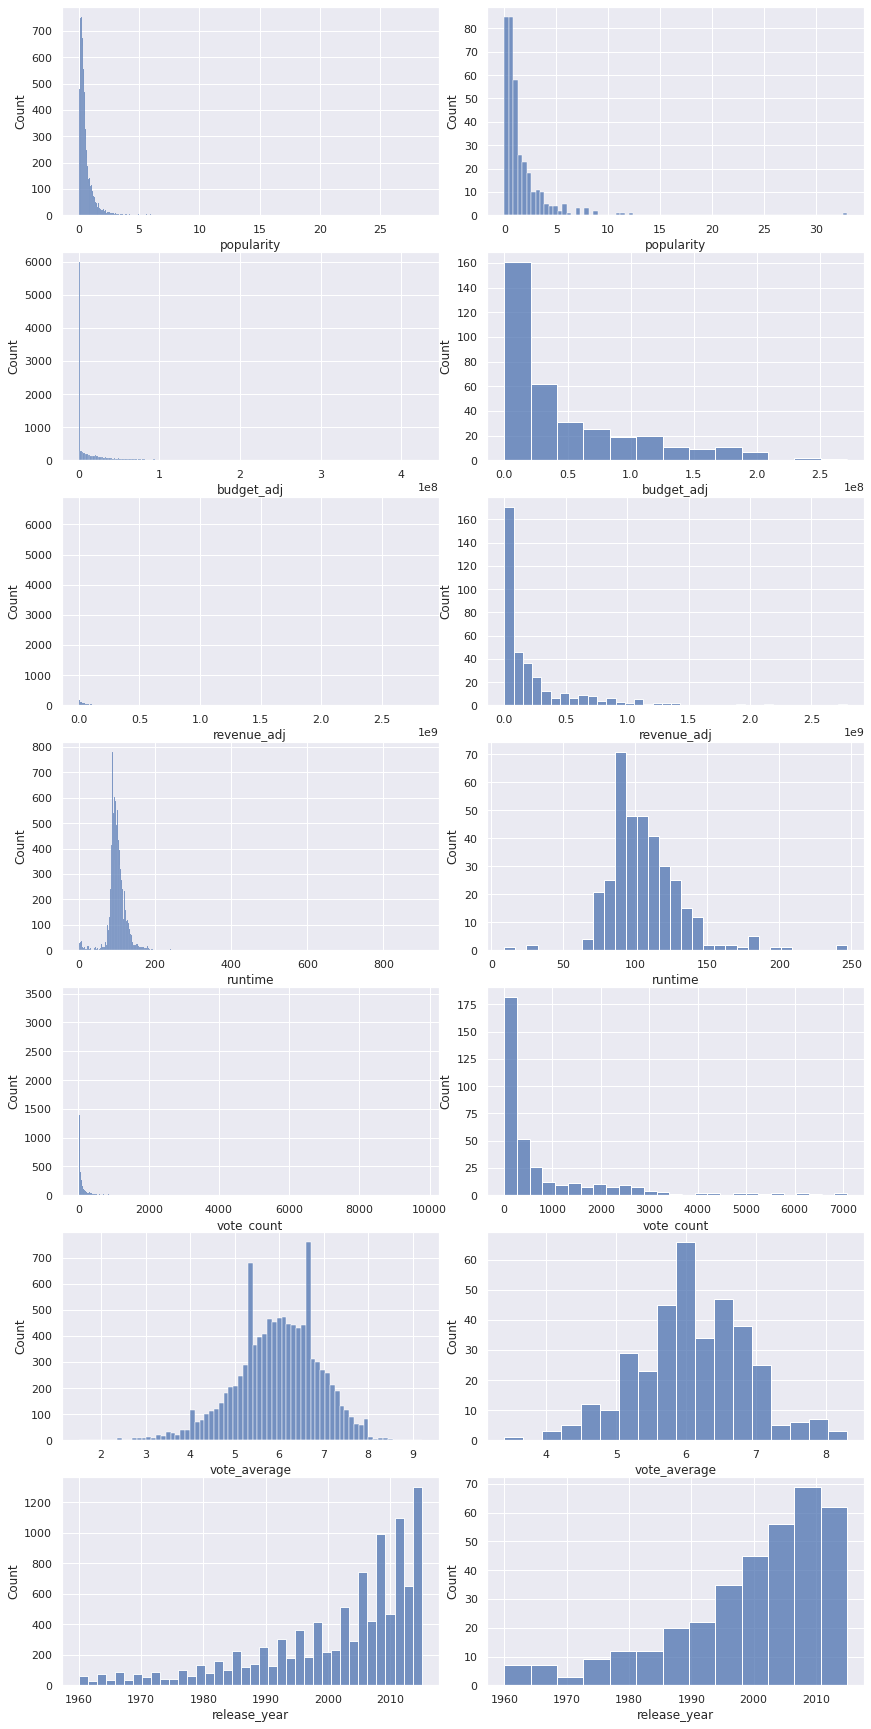

In [471]:
# Draw the distributions of all variables
f, axes = plt.subplots(7, 2, figsize=(12, 24))
f.tight_layout()

count = 0
for var in movies_col:
    if var == 'is_remake': break
    sb.histplot(data = non_remake_cols[var], ax = axes[count, 0])
    sb.histplot(data = remake_cols[var], ax = axes[count, 1])
    count += 1

Using a categorization plot to get an overview of how many movies within the datasets are remake.

Ratio of the classes Y : N = 359 : 10483


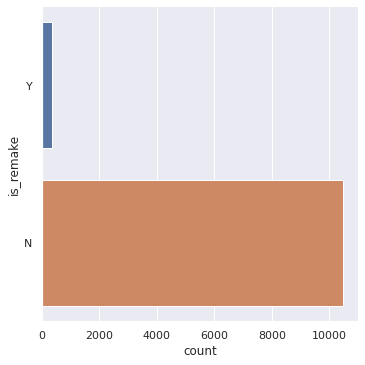

In [472]:
# Show amount of remakes and non remakes
ratio = movies_df['is_remake'].value_counts()
sb.catplot(y = 'is_remake', data = movies_df, kind = 'count')

print(f"Ratio of the classes Y : N = {ratio.loc['Y']} : {ratio.loc['N']}")

We will look at what type of movie genres that are usually remake

In [557]:
# Group movies by genre using title as unique identifier and display all genres.
genre_kind = pd.unique(remake_cols[['genres_1', 'genres_2']].dropna().values.ravel('K'))

print('Total genres:', len(genre_kind))
print(genre_kind)

Total genres: 17
['Horror' 'Crime' 'Action' 'Family' 'Drama' 'War' 'Adventure' 'Comedy'
 'Romance' 'Animation' 'Thriller' 'Fantasy' 'Mystery' 'Science Fiction'
 'Music' 'Documentary' 'History']


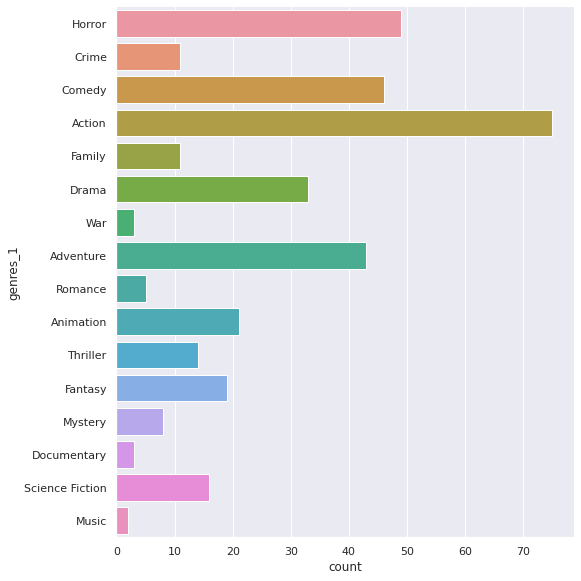

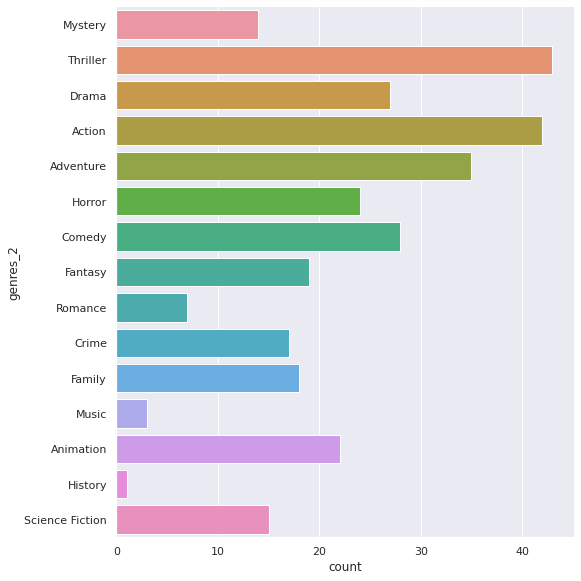

In [578]:
# x = remake_cols['genres_1']
# x

comb_genres = remake_cols.groupby(['genres_1', 'genres_2']).sum().unstack()
sb.catplot(y = "genres_1", data = remake_cols, kind = "count", height = 8)
sb.catplot(y = "genres_2", data = remake_cols, kind = "count", height = 8)

<AxesSubplot:xlabel='genres_2', ylabel='genres_1'>

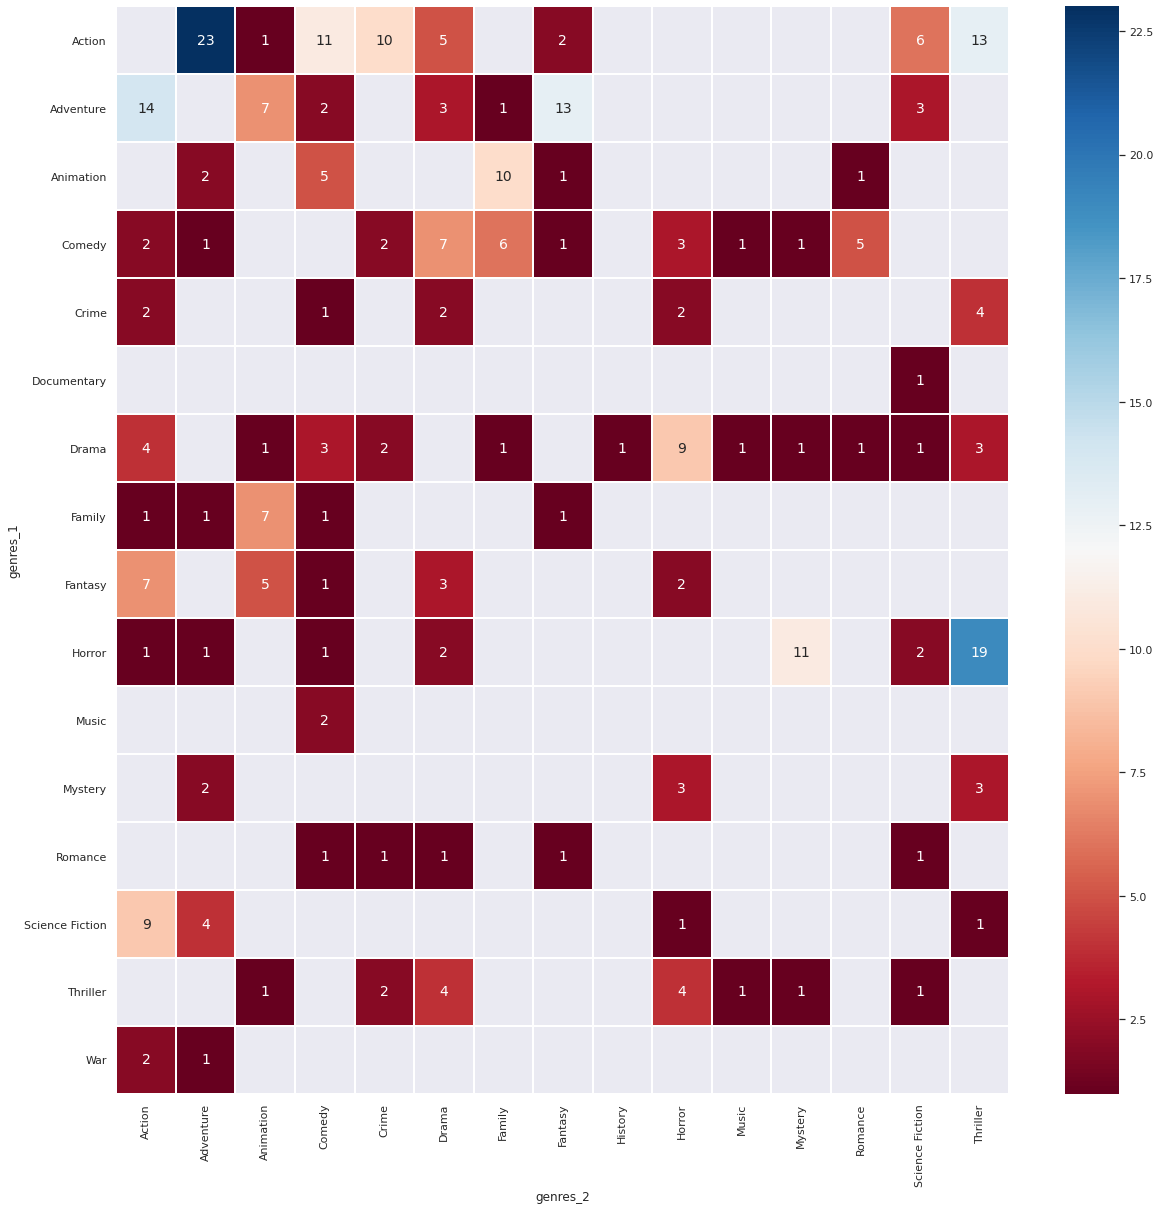

In [560]:
#df['comb_genres'] = remake_cols[]
#remake_genres = remake_cols.groupby(['genres_1', 'genres_2']).value.reset_index(name='percentage')
#remake_genres = remake_genres[remake_genres['genres_2'] != '']


#df['comb_genres'] = df.remake_cols('genres_1', as_index=False)['label'].transform(lambda x: x.count())
comb_genres = remake_cols.groupby(['genres_1', 'genres_2']).size().unstack()

f = plt.figure(figsize=(20, 20))
sb.heatmap(comb_genres, linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "RdBu")

Movies under the genres of *Action, Adventure, Fantasy, Horror, and Thriller* tends to be popular for remake.

Check the earning